In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kstest, uniform
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

np.random.seed(42)

In [ ]:
class LCG:
    """
    Linear Congruential Generator
    X_{n+1} = (a * X_n + c) mod m
    """
    def __init__(self, seed, a, c, m):
        self.seed = seed
        self.a = a
        self.c = c
        self.m = m
        self.current = seed
    
    def next(self):
        """Genera el siguiente número en la secuencia"""
        self.current = (self.a * self.current + self.c) % self.m
        return self.current
    
    def generate_sample(self, n):
        sample = []
        for _ in range(n):
            sample.append(self.next())
        return np.array(sample)
    
    def generate_uniform(self, n):
        """Genera una muestra uniforme en [0, 1)"""
        integers = self.generate_sample(n)
        return integers / self.m
    
    def reset(self):
        self.current = self.seed

In [ ]:
m1 = 2**31 - 1  # Número primo de Mersenne
a1 = 7**5       # 16807
c1 = 0          # Generador multiplicativo
seed1 = 123456789

N = 100000  # Tamaño de muestra

print("=" * 60)
print("CONJUNTO 1 DE PARÁMETROS LCG")
print("=" * 60)
print(f"Módulo (m): {m1:,}")
print(f"Multiplicador (a): {a1:,}")
print(f"Incremento (c): {c1}")
print(f"Semilla: {seed1:,}")
print(f"Tamaño de muestra: {N:,}")
print("=" * 60)

CONJUNTO 1 DE PARÁMETROS LCG
Módulo (m): 2,147,483,647
Multiplicador (a): 16,807
Incremento (c): 0
Semilla: 123,456,789
Tamaño de muestra: 100,000


In [ ]:
lcg1 = LCG(seed1, a1, c1, m1)
sample_uniform_lcg1 = lcg1.generate_uniform(N)

# Estadísticos descriptivos
print("\nESTADÍSTICOS DESCRIPTIVOS - LCG")
print("-" * 60)
print(f"Media: {np.mean(sample_uniform_lcg1):.6f} (teórico: 0.5)")
print(f"Varianza: {np.var(sample_uniform_lcg1):.6f} (teórico: {1/12:.6f})")
print(f"Desviación estándar: {np.std(sample_uniform_lcg1):.6f} (teórico: {np.sqrt(1/12):.6f})")
print(f"Mínimo: {np.min(sample_uniform_lcg1):.6f}")
print(f"Máximo: {np.max(sample_uniform_lcg1):.6f}")
print(f"Mediana: {np.median(sample_uniform_lcg1):.6f}")

# Prueba de Kolmogorov-Smirnov
ks_stat_lcg1, p_value_lcg1 = kstest(sample_uniform_lcg1, 'uniform')
print(f"\nPRUEBA DE KOLMOGOROV-SMIRNOV:")
print(f"Estadístico KS: {ks_stat_lcg1:.6f}")
print(f"P-valor: {p_value_lcg1:.6f}")
print(f"Resultado: {'RECHAZA H0' if p_value_lcg1 < 0.05 else 'NO RECHAZA H0'} (α=0.05)")
print(f"Interpretación: La muestra {'NO' if p_value_lcg1 < 0.05 else 'SÍ'} sigue una distribución uniforme")


ESTADÍSTICOS DESCRIPTIVOS - LCG Conjunto 1:
------------------------------------------------------------
Media: 0.499072 (teórico: 0.5)
Varianza: 0.082958 (teórico: 0.083333)
Desviación estándar: 0.288025 (teórico: 0.288675)
Mínimo: 0.000016
Máximo: 0.999977
Mediana: 0.499352

PRUEBA DE KOLMOGOROV-SMIRNOV:
Estadístico KS: 0.003033
P-valor: 0.315721
Resultado: NO RECHAZA H0 (α=0.05)
Interpretación: La muestra SÍ sigue una distribución uniforme


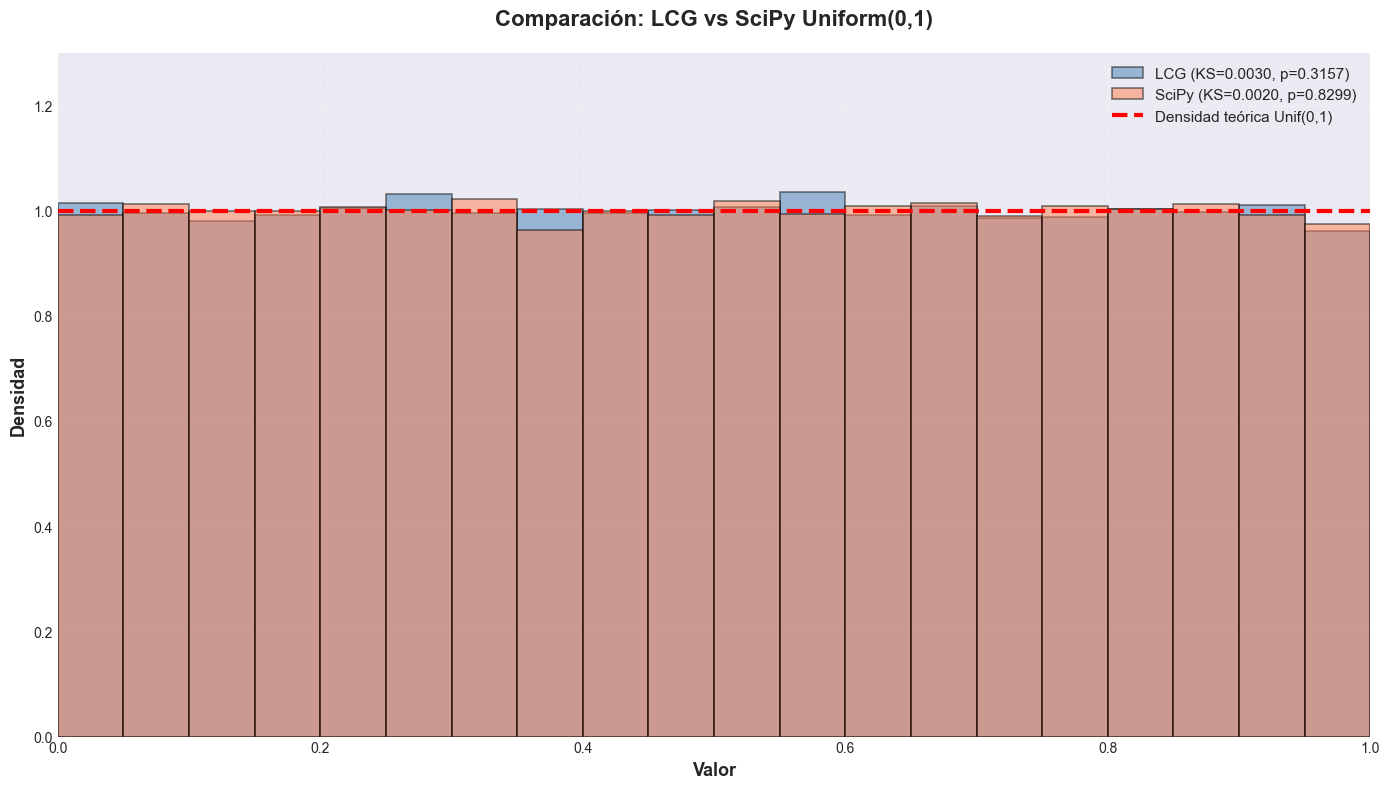

In [ ]:
np.random.seed(42)
sample_scipy = np.random.uniform(0, 1, N)

ks_stat_lcg1, p_value_lcg1 = kstest(sample_uniform_lcg1, 'uniform')
ks_stat_scipy, p_value_scipy = kstest(sample_scipy, 'uniform')

# Crear figura
fig, ax = plt.subplots(figsize=(14, 8))

# Histogramas superpuestos
ax.hist(sample_uniform_lcg1, bins=20, density=True, alpha=0.5, 
        color='steelblue', edgecolor='black', linewidth=1.2,
        label=f'LCG (KS={ks_stat_lcg1:.4f}, p={p_value_lcg1:.4f})')

ax.hist(sample_scipy, bins=20, density=True, alpha=0.5, 
        color='coral', edgecolor='black', linewidth=1.2,
        label=f'SciPy (KS={ks_stat_scipy:.4f}, p={p_value_scipy:.4f})')

# Línea de densidad teórica
ax.axhline(y=1, color='red', linestyle='--', linewidth=3, 
           label='Densidad teórica Unif(0,1)', zorder=10)

ax.set_xlabel('Valor', fontsize=13, fontweight='bold')
ax.set_ylabel('Densidad', fontsize=13, fontweight='bold')
ax.set_title('Comparación: LCG vs SciPy Uniform(0,1)', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='upper right', framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1.3])

plt.tight_layout()
plt.show()